In [1]:
!pip install -qq opencv-python

0. 설치 확인

In [2]:
import cv2
print(cv2.__version__)

4.9.0


1. 이미지 읽어오기 및 정보 출력

In [3]:
# 이미지 읽어오기
img = cv2.imread('example_img1.png')
img

array([[[109,  22,   6],
        [130,  50,  27],
        [164,  93,  60],
        ...,
        [141, 248, 252],
        [110, 228, 229],
        [ 94, 217, 215]],

       [[149,  66,  45],
        [136,  57,  30],
        [162,  91,  54],
        ...,
        [ 79, 183, 188],
        [132, 245, 248],
        [115, 235, 235]],

       [[132,  57,  25],
        [118,  44,   8],
        [195, 120,  76],
        ...,
        [ 90, 188, 194],
        [124, 230, 237],
        [143, 254, 255]],

       ...,

       [[ 35,  18,  45],
        [ 36,  20,  44],
        [ 35,  20,  41],
        ...,
        [ 37,  26,  34],
        [ 42,  30,  36],
        [ 38,  26,  32]],

       [[ 45,  33,  53],
        [ 41,  29,  47],
        [ 38,  26,  44],
        ...,
        [ 35,  24,  32],
        [ 40,  28,  34],
        [ 40,  26,  32]],

       [[ 47,  37,  53],
        [ 39,  29,  45],
        [ 36,  24,  42],
        ...,
        [ 30,  19,  27],
        [ 41,  27,  33],
        [ 44,  30,  36]]

In [4]:
# # 이미지 정보 출력
print(f"이미지 크기: {img.shape}")  # (높이, 너비, 채널)
print(f"이미지 유형: {img.dtype}")  # 데이터 타입
print(f"이미지 차원:, {img.ndim}") #차원
print(f"이미지 사이즈:, {img.size}") #차원

print(f"최소값: {img.min()}")
print(f"최대값: {img.max()}")

이미지 크기: (640, 1024, 3)
이미지 유형: uint8
이미지 차원:, 3
이미지 사이즈:, 1966080
최소값: 0
최대값: 255


2-1. 이미지 출력

In [5]:
# 이미지 출력 - opencv로 출력해보기
cv2.imshow('Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

샘플 이미지<br><br>
<img src="example_img1.png" width=50% height=50%>

2-2. 이미지 출력 - matplotlib 로 출력해보기

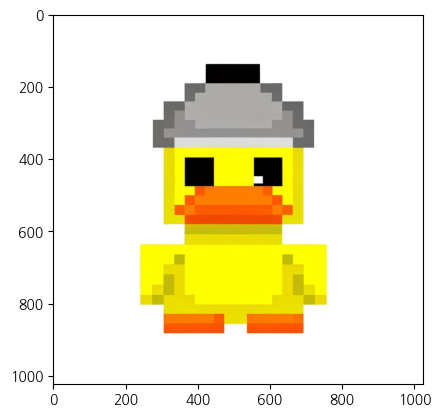

In [14]:
import matplotlib.pyplot as plt
img_bgr = cv2.imread("duck2.webp")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
# plt.axis('off')  # 축 표시 제거
plt.show()

In [15]:
img_rgb.shape

(1024, 1024, 3)

In [ ]:

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('Image Displayed with Matplotlib')
plt.axis('off')  # 축 표시 제거
plt.show()

3. 이미지 저장

In [5]:
# 이미지 저장
cv2.imwrite('new_image.jpg', img)

True

4-1. 픽셀 값에 접근 및 변경해보기

In [6]:
# 픽셀 값 접근 및 변경
pixel = img[100, 100]  # (100, 100) 위치 픽셀 값 가져오기
print(f"픽셀 값: {pixel}")

pixel[0] = 255  # 빨강 채널 값 변경
changed_img = img.copy()
changed_img[100, 100] = pixel  # 변경된 픽셀 값 설정
print(f"변경된 픽셀 값: {pixel}")

픽셀 값: [129  54  32]
변경된 픽셀 값: [255  54  32]


4-2. 픽셀 값 다뤄보기 - ROI(Region of interest)추출<br>
roi = img[y+y+h, x:x+w] 방식으로 추출합니다

In [18]:
# 이미지 출력
cv2.imshow('Image_0', img)
cv2.imshow('Image_1', img[:200, :500])
cv2.imshow('Image_2', img[200:, 500:])
cv2.waitKey(0)
cv2.destroyWindow("Image_0")
cv2.destroyWindow("Image_1")
cv2.destroyWindow("Image_2")

4-3. 이미지 바꿔보기

In [37]:
star = cv2.imread('star.jpg')
resized_star = cv2.resize(star, (128, 128))
img[:128, :128] = resized_star
cv2.imshow('Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

5-1. 이미지 채널 분리 및 합성해보기

In [ ]:
# 이미지 채널 분리
b, g, r = cv2.split(img)  # B, G, R 채널 분리

# 이미지 채널 합성
img_merged = cv2.merge([b, g, r])  # B, G, R 채널 합성

5-2. 채널 색상 변경 해보기

In [55]:
img = cv2.imread('example_img1.png')
b, g, r = cv2.split(img)  # B, G, R 채널 분리

In [56]:
import numpy as np
# 녹색 채널 픽셀을 절반으로 변경
g = cv2.divide(g, 2)
# 빨간색 채널의 픽셀 값에 50 더해보기(255 초과하지 않게, np.clip 사용)
r = cv2.add(r, 50)
# r = np.clip(r, 0, 255)

In [57]:
img_merged = cv2.merge([b, g, r])
cv2.imshow('orginal_Image', img)
cv2.imshow('Modified_Image', img_merged)

cv2.waitKey(0)
cv2.destroyAllWindows()

6-1. 이미지 변환해보기 - 컬러 및 흑백

In [12]:
img = cv2.imread('example_img1.png')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('gray_img', gray_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

6-2. 이미지 크기 조정

In [60]:
# 이미지를 절반 크기로 조정
resized_img = cv2.resize(img, (0, 0), fx=0.5, fy=0.5)
print(resized_img.shape)
# 결과 이미지 저장 또는 표시
cv2.imshow('resized_img', resized_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

(320, 512, 3)


6-3. 이미지 회전

In [67]:
# 이미지 로드
img = cv2.imread('example_img1.png')

# 이미지 중심을 기준으로 45도 회전해보기
center = (img.shape[1] // 2, img.shape[0] // 2)
print(center)
rotation_matrix_45 = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_img_45 = cv2.warpAffine(img, rotation_matrix_45, (img.shape[1], img.shape[0]))

# 이미지 중심을 기준으로 90도 회전해보기
rotation_matrix_90 = cv2.getRotationMatrix2D(center, 90, 1.0)
rotated_img_90 = cv2.warpAffine(img, rotation_matrix_90, (img.shape[1], img.shape[0]))

cv2.imshow('rotated_image_45', rotated_img_45)
cv2.imshow('rotated_image_90', rotated_img_90)
cv2.waitKey(0)
cv2.destroyAllWindows()

(512, 320)


6-4.이미지 뒤집기

In [68]:
img = cv2.imread('example_img1.png')

flipped_img = cv2.flip(img, 1)
cv2.imshow('flipped_img', flipped_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [70]:
# 이미지를 HSV 색상 공간으로 변환
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 결과 표시
cv2.imshow('hsv_img', hsv_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

7. 마스크 이미지 적용

In [147]:
# 원본 이미지 로드
original_img = cv2.imread('example_img1.png')

# 마스크 이미지 로드 (원본 이미지와 같은 크기, 흑백 이미지)
mask = cv2.imread('mask_heart.jpg', cv2.IMREAD_GRAYSCALE)
print(original_img.shape, mask.shape)
# 마스크 이미지를 이용해서 특정 부분만 보존
masked_img = cv2.bitwise_and(original_img, original_img, mask=mask)

# # 최종 결과 이미지 표시
cv2.imwrite("masked_img.jpg", masked_img)
cv2.imshow('masked_img', masked_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

(640, 1024, 3) (640, 1024)


8-1. 효과 적용 - 가우시안 블러

In [155]:
img = cv2.imread('example_img2.webp')
# 가우시안 블러 적용
gaussian_blur_img = cv2.GaussianBlur(img, (5, 5), 0) # img, 커널크기, sigmaX

# 결과 표시
cv2.imwrite("gaussian_blur_img.jpg", gaussian_blur_img)
cv2.imshow('orginal_img', img)
cv2.imshow('gaussian_blur_img', gaussian_blur_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

8-2. 엣지 검출

In [156]:
img = cv2.imread('example_img2.webp')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 가우시안 블러 적용
edges = cv2.Canny(img, 100, 200) # 100이하의 픽셀은 엣지X, 200이상의 픽셀은 엣지
edges_gray = cv2.Canny(gray_img, 100, 200) # 100이하의 픽셀은 엣지X, 200이상의 픽셀은 엣지

# 결과 표시
cv2.imwrite("edge_img.jpg", edges_gray)
cv2.imshow('edges', edges)
cv2.imshow('edges_gray', edges_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

8-3. 임계값 처리

In [157]:
# 임계값 처리 적용
img = cv2.imread('example_img2.webp')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)

# 결과 표시
cv2.imwrite("thresh_img.jpg", thresh_img)
cv2.imshow('thresh_img', thresh_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

9. 기하학 변환

In [149]:
img = cv2.imread('business-card_640.jpg')
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [152]:
w,h = 720,480

srcQuad = np.array([[160,207],[395,112],[487,221],[239,327]],np.float32)
dstQuad = np.array([[0,0],[w-1,0],[w-1,h-1],[0,h-1]],np.float32)

pers = cv2.getPerspectiveTransform(srcQuad,dstQuad) #원근 행렬맵 생성
dst = cv2.warpPerspective(img,pers,(w,h)) #원근맵에 대한 기하학전 변형

cv2.imshow('img', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

10-1. 이미지에 사각형, 원, 텍스트 표시 해보기

In [24]:
img = cv2.imread("example_img1.png")
# bbox 좌표를 설정합니다. (x, y)는 상자의 왼쪽 상단 모서리 좌표이고,
# w와 h는 각각 상자의 너비와 높이입니다.
x, y, w, h = 250, 250, 200, 200  # 예시 좌표입니다. 

# 이미지에 경계 상자를 그립니다. 여기서는 빨간색(0, 0, 255) 상자를 그리고, 선 두께는 2로 설정합니다.
cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)

# 원 그려보기
cv2.circle(img, (700, 200), 50, (255, 0, 0), -1)

# 텍스트 입력해보기
cv2.putText(img, "opencv study!!", (50, 600), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

# 경계 상자가 그려진 이미지를 화면에 표시합니다.
cv2.imshow('Image with Bounding Box', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

10-2. 마우스로 그려보기

In [3]:
# 전역 변수 초기화
drawing = False # 마우스가 클릭된 상태인지 확인하기 위한 플래그
ix, iy = -1, -1 # 초기 위치
ex, ey = -1, -1 # 끝 위치

# 마우스 콜백 함수
def draw_rectangle(event, x, y, flags, param):
    global ix, iy, drawing, ex, ey

    if event == cv2.EVENT_LBUTTONDOWN: # 마우스 왼쪽 버튼을 누르면
        drawing = True
        ix, iy = x, y

    elif event == cv2.EVENT_MOUSEMOVE: # 마우스를 움직이면
        if drawing == True:
            ex, ey = x, y

    elif event == cv2.EVENT_LBUTTONUP: # 마우스 왼쪽 버튼을 떼면
        drawing = False
        ex, ey = x, y
        cv2.rectangle(img, (ix, iy), (ex, ey), (0, 0, 255), 2)

# 이미지 불러오기
img = cv2.imread("example_img1.png")
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_rectangle)

while(1):
    cv2.imshow('image', img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27: # ESC 키를 누르면 종료
        break

cv2.destroyAllWindows()


11. 마우스로 영역 지정후, 기하 변환

In [9]:
points = [] # 클릭한 점들을 저장할 리스트

# 마우스 콜백 함수 - 클릭 순서는 왼쪽상단부터 시계방향으로 클릭
def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN and len(points) < 4: # 4개 미만의 점을 클릭한 경우
        points.append((x, y))
        cv2.circle(img, (x, y), 5, (0, 255, 0), -1) # 클릭한 위치에 초록색 원을 그림
        cv2.putText(img, f"{len(points)}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA)
        cv2.imshow('Image', img)

        if len(points) == 4: # 4개의 점이 선택되었을 때
            warp_perspective()

def warp_perspective():
    # 변환될 이미지의 가로와 세로 크기를 정합니다.
    w, h = 300, 200
    src = np.float32(points) # 원본 이미지에서 4개의 점
    dst = np.float32([[0, 0], [w, 0], [w, h], [0, h]]) # 목적지 이미지에서 4개의 점

    # 원근 변환 행렬을 계산합니다.
    matrix = cv2.getPerspectiveTransform(src, dst)
    # 원근 변환을 적용합니다.
    result = cv2.warpPerspective(img, matrix, (w, h))

    cv2.imshow('Perspective Transformation', result)

# 이미지를 불러옵니다.
img = cv2.imread('business-card_640.jpg') # 'business-card_640.jpg'를 사용자의 이미지 경로로 변경해주세요.
cv2.imshow('Image', img)
cv2.setMouseCallback('Image', click_event)
cv2.waitKey(0)
cv2.destroyAllWindows()